In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib as mpl
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True) 
mpl.style.use('seaborn')
pd.set_option('display.max_columns', 1000)

In [2]:
df=pd.read_csv("AUDUSD_H4.csv")
df.columns = df.columns.str.replace('.','_')
df.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p
0,2010-01-05 18:00:00+00:00,1/5/2010 18:00,1/5/2010 22:00,0.9132,0.9153,0.9110,0.9124,-0.31,0.50,1.72,0.0,0.0,0.0004,0.0012,0.0010,0.0020,0.0065,0.0076,0.0,0.706,-0.540,NaN,NaN,NaN,NaN,0.937,-0.538,NaN,NaN,NaN,NaN,-0.571,-0.495,NaN,NaN,NaN,NaN,-0.423,-0.628,NaN,NaN,NaN,NaN,0.953,0.334,NaN,NaN,NaN,NaN
1,2010-01-05 22:00:00+00:00,1/5/2010 22:00,1/6/2010 2:00,0.9123,0.9126,0.9090,0.9117,-0.16,-0.03,1.64,0.0,0.0,0.0004,0.0006,0.0013,0.0011,0.0049,0.0073,0.0,0.848,-0.546,NaN,NaN,NaN,NaN,0.878,-0.657,NaN,NaN,NaN,NaN,-0.735,0.273,NaN,NaN,NaN,NaN,-0.606,-0.307,NaN,NaN,NaN,NaN,0.924,0.744,NaN,NaN,NaN,NaN
2,2010-01-06 02:00:00+00:00,1/6/2010 2:00,1/6/2010 6:00,0.9114,0.9138,0.9102,0.9135,0.12,0.13,1.84,0.0,0.0,0.0009,0.0007,0.0012,0.0011,0.0027,0.0070,0.0,0.894,-0.510,NaN,NaN,NaN,NaN,0.849,-0.627,NaN,NaN,NaN,NaN,-0.727,0.409,NaN,NaN,NaN,NaN,-0.469,-0.137,NaN,NaN,NaN,NaN,0.886,0.622,NaN,NaN,NaN,NaN
3,2010-01-06 06:00:00+00:00,1/6/2010 6:00,1/6/2010 10:00,0.9134,0.9143,0.9123,0.9142,0.27,0.14,1.76,0.0,0.0,0.0004,0.0011,0.0009,0.0011,0.0018,0.0065,0.0,0.915,-0.466,NaN,NaN,NaN,NaN,0.787,-0.433,NaN,NaN,NaN,NaN,-0.719,0.337,NaN,NaN,NaN,NaN,0.014,0.248,NaN,NaN,NaN,NaN,0.813,0.419,NaN,NaN,NaN,NaN
4,2010-01-06 10:00:00+00:00,1/6/2010 10:00,1/6/2010 14:00,0.9140,0.9151,0.9097,0.9142,0.08,-0.01,2.13,0.0,0.0,0.0000,0.0003,0.0010,0.0011,0.0011,0.0059,0.0,0.932,-0.562,NaN,NaN,NaN,NaN,0.690,-0.481,NaN,NaN,NaN,NaN,-0.644,0.421,NaN,NaN,NaN,NaN,0.510,0.545,NaN,NaN,NaN,NaN,0.694,0.405,NaN,NaN,NaN,NaN


In [3]:
df['target1'] = df['bid_close'].shift(-1)
df['target2'] = df['bid_close'].shift(-2)
df['target3'] = df['bid_close'].shift(-3)

In [4]:
df['PC_AUD_H4_target1'] = ((df['target1']-df['bid_close'])/df['target1'])*100
df['PC_AUD_H4_target2'] = ((df['target2']-df['bid_close'])/df['target2'])*100
df['PC_AUD_H4_target3'] = ((df['target3']-df['bid_close'])/df['target3'])*100

In [5]:
df['trend_ema']=ta.trend.ema_indicator(df['bid_close'], n=12, fillna=True)

In [6]:
df['mo_rsi']=ta.momentum.rsi(df['bid_close'], n=14, fillna=True)

In [7]:
df['vol_atr']=ta.volatility.average_true_range(df['bid_high'], df['bid_low'], df['bid_close'], n=14, fillna=True)

In [8]:
df.head(10)

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,target1,target2,target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,trend_ema,mo_rsi,vol_atr
0,2010-01-05 18:00:00+00:00,1/5/2010 18:00,1/5/2010 22:00,0.9132,0.9153,0.9110,0.9124,-0.31,0.50,1.72,0.00,0.0,0.0004,0.0012,0.0010,0.0020,0.0065,0.0076,0.0000,0.706,-0.540,NaN,NaN,NaN,NaN,0.937,-0.538,NaN,NaN,NaN,NaN,-0.571,-0.495,NaN,NaN,NaN,NaN,-0.423,-0.628,NaN,NaN,NaN,NaN,0.953,0.334,NaN,NaN,NaN,NaN,0.9117,0.9135,0.9142,-0.076780,0.120416,0.196893,0.912400,50.000000,0.003669
1,2010-01-05 22:00:00+00:00,1/5/2010 22:00,1/6/2010 2:00,0.9123,0.9126,0.9090,0.9117,-0.16,-0.03,1.64,0.00,0.0,0.0004,0.0006,0.0013,0.0011,0.0049,0.0073,0.0000,0.848,-0.546,NaN,NaN,NaN,NaN,0.878,-0.657,NaN,NaN,NaN,NaN,-0.735,0.273,NaN,NaN,NaN,NaN,-0.606,-0.307,NaN,NaN,NaN,NaN,0.924,0.744,NaN,NaN,NaN,NaN,0.9135,0.9142,0.9142,0.197044,0.273463,0.273463,0.912021,0.000000,0.003664
2,2010-01-06 02:00:00+00:00,1/6/2010 2:00,1/6/2010 6:00,0.9114,0.9138,0.9102,0.9135,0.12,0.13,1.84,0.00,0.0,0.0009,0.0007,0.0012,0.0011,0.0027,0.0070,0.0000,0.894,-0.510,NaN,NaN,NaN,NaN,0.849,-0.627,NaN,NaN,NaN,NaN,-0.727,0.409,NaN,NaN,NaN,NaN,-0.469,-0.137,NaN,NaN,NaN,NaN,0.886,0.622,NaN,NaN,NaN,NaN,0.9142,0.9142,0.9156,0.076570,0.076570,0.229358,0.912598,74.792244,0.003659
3,2010-01-06 06:00:00+00:00,1/6/2010 6:00,1/6/2010 10:00,0.9134,0.9143,0.9123,0.9142,0.27,0.14,1.76,0.00,0.0,0.0004,0.0011,0.0009,0.0011,0.0018,0.0065,0.0000,0.915,-0.466,NaN,NaN,NaN,NaN,0.787,-0.433,NaN,NaN,NaN,NaN,-0.719,0.337,NaN,NaN,NaN,NaN,0.014,0.248,NaN,NaN,NaN,NaN,0.813,0.419,NaN,NaN,NaN,NaN,0.9142,0.9156,0.9184,0.000000,0.152905,0.457317,0.913104,81.126356,0.003541
4,2010-01-06 10:00:00+00:00,1/6/2010 10:00,1/6/2010 14:00,0.9140,0.9151,0.9097,0.9142,0.08,-0.01,2.13,0.00,0.0,0.0000,0.0003,0.0010,0.0011,0.0011,0.0059,0.0000,0.932,-0.562,NaN,NaN,NaN,NaN,0.690,-0.481,NaN,NaN,NaN,NaN,-0.644,0.421,NaN,NaN,NaN,NaN,0.510,0.545,NaN,NaN,NaN,NaN,0.694,0.405,NaN,NaN,NaN,NaN,0.9156,0.9184,0.9196,0.152905,0.457317,0.587212,0.913402,81.126356,0.003674
5,2010-01-06 14:00:00+00:00,1/6/2010 14:00,1/6/2010 18:00,0.9142,0.9166,0.9125,0.9156,0.15,0.04,2.01,0.00,0.0,0.0007,0.0007,0.0013,0.0012,0.0012,0.0045,0.0000,0.865,-0.746,NaN,NaN,NaN,NaN,0.292,-0.417,NaN,NaN,NaN,NaN,0.151,0.034,NaN,NaN,NaN,NaN,0.591,0.730,NaN,NaN,NaN,NaN,0.292,0.063,NaN,NaN,NaN,NaN,0.9184,0.9196,0.9236,0.304878,0.434972,0.866176,0.913936,88.692180,0.003704
6,2010-01-06 18:00:00+00:00,1/6/2010 18:00,1/6/2010 22:00,0.9156,0.9201,0.9148,0.9184,0.46,0.57,1.44,2.39,0.0,0.0014,0.0017,0.0017,0.0020,0.0017,0.0030,0.0076,0.546,-0.951,0.944,-0.870,NaN,NaN,-0.601,-0.666,0.925,-0.381,NaN,NaN,0.063,-0.206,-0.511,-0.102,NaN,NaN,0.658,0.878,0.337,0.666,NaN,NaN,-0.834,0.160,0.945,0.118,NaN,NaN,0.9196,0.9236,0.9205,0.130492,0.563014,0.228137,0.914932,94.126046,0.003818
7,2010-01-06 22:00:00+00:00,1/6/2010 22:00,1/7/2010 2:00,0.9186,0.9217,0.9168,0.9196,0.44,0.79,1.29,2.52,0.0,0.0006,0.0017,0.0022,0.0026,0.0023,0.0027,0.0075,0.830,-0.972,0.948,-0.943,NaN,NaN,-0.415,-0.911,0.946,-0.603,NaN,NaN,-0.681,0.226,-0.345,-0.009,NaN,NaN,0.384,0.825,0.675,0.797,NaN,NaN,-0.856,0.643,0.946,0.200,NaN,NaN,0.9236,0.9205,0.9187,0.433088,0.097773,-0.097965,0.915906,95.253869,0.003895
8,2010-01-07 02:00:00+00:00,1/7/

In [9]:
df.columns

Index(['time_local', 'start_time_local', 'end_time_local', 'bid_open',
       'bid_high', 'bid_low', 'bid_close', 'PC2_AUD_H4', 'PC7_AUD_H4',
       'PC14_AUD_H4', 'PC20_AUD_H4', 'PC50_AUD_H4', 'STDEV_AUD_H4_1p',
       'STDEV_AUD_H4_2p', 'STDEV_AUD_H4_4p', 'STDEV_AUD_H4_7p',
       'STDEV_AUD_H4_10p', 'STDEV_AUD_H4_14p', 'STDEV_AUD_H4_20p',
       'CS_AUD_CAD_H4_7', 'correl_AUD_CAD_7p', 'CS_AUD_CAD_H4_10',
       'correl_AUD_CAD_10p', 'CS_AUD_CAD_H4_20', 'correl_AUD_CAD_20p',
       'CS_AUD_CHF_H4_7', 'correl_AUD_CHF_7p', 'CS_AUD_CHF_H4_10',
       'correl_AUD_CHF_10p', 'CS_AUD_CHF_H4_20', 'correl_AUD_CHF_20p',
       'CS_AUD_GBP_H4_7', 'correl_AUD_GBP_7p', 'CS_AUD_GBP_H4_10',
       'correl_AUD_GBP_10p', 'CS_AUD_GBP_H4_20', 'correl_AUD_GBP_20p',
       'CS_AUD_JPY_H4_7', 'correl_AUD_JPY_7p', 'CS_AUD_JPY_H4_10',
       'correl_AUD_JPY_10p', 'CS_AUD_JPY_H4_20', 'correl_AUD_JPY_20p',
       'CS_EUR_AUD_H4_7', 'correl_EUR_AUD_7p', 'CS_EUR_AUD_H4_10',
       'correl_EUR_AUD_10p', 'CS_EUR_

In [10]:
df_final=df[['time_local', 'start_time_local', 'end_time_local', 'bid_open','bid_high', 'bid_low', 'bid_close','target1', 'target2', 'target3', 'PC_AUD_H4_target1',
       'PC_AUD_H4_target2', 'PC_AUD_H4_target3', 'trend_ema', 'mo_rsi','vol_atr']]

In [11]:
#df_final1=df_final.set_index('time_local')

In [12]:
df_final.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,target1,target2,target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,trend_ema,mo_rsi,vol_atr
0,2010-01-05 18:00:00+00:00,1/5/2010 18:00,1/5/2010 22:00,0.9132,0.9153,0.9110,0.9124,0.9117,0.9135,0.9142,-0.076780,0.120416,0.196893,0.912400,50.000000,0.003669
1,2010-01-05 22:00:00+00:00,1/5/2010 22:00,1/6/2010 2:00,0.9123,0.9126,0.9090,0.9117,0.9135,0.9142,0.9142,0.197044,0.273463,0.273463,0.912021,0.000000,0.003664
2,2010-01-06 02:00:00+00:00,1/6/2010 2:00,1/6/2010 6:00,0.9114,0.9138,0.9102,0.9135,0.9142,0.9142,0.9156,0.076570,0.076570,0.229358,0.912598,74.792244,0.003659
3,2010-01-06 06:00:00+00:00,1/6/2010 6:00,1/6/2010 10:00,0.9134,0.9143,0.9123,0.9142,0.9142,0.9156,0.9184,0.000000,0.152905,0.457317,0.913104,81.126356,0.003541
4,2010-01-06 10:00:00+00:00,1/6/2010 10:00,1/6/2010 14:00,0.9140,0.9151,0.9097,0.9142,0.9156,0.9184,0.9196,0.152905,0.457317,0.587212,0.913402,81.126356,0.003674


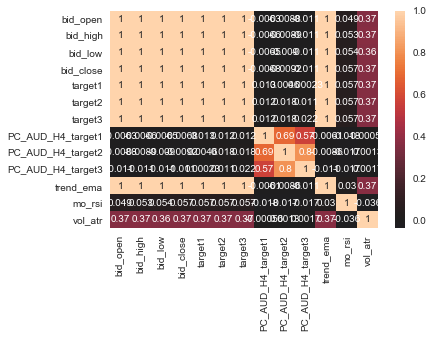

In [13]:
import seaborn as sns
sns.heatmap(df_final.corr(),center=0,annot=True)

In [14]:
df_final2=df_final.dropna(axis=0)

In [15]:
df_final2.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,target1,target2,target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,trend_ema,mo_rsi,vol_atr
0,2010-01-05 18:00:00+00:00,1/5/2010 18:00,1/5/2010 22:00,0.9132,0.9153,0.9110,0.9124,0.9117,0.9135,0.9142,-0.076780,0.120416,0.196893,0.912400,50.000000,0.003669
1,2010-01-05 22:00:00+00:00,1/5/2010 22:00,1/6/2010 2:00,0.9123,0.9126,0.9090,0.9117,0.9135,0.9142,0.9142,0.197044,0.273463,0.273463,0.912021,0.000000,0.003664
2,2010-01-06 02:00:00+00:00,1/6/2010 2:00,1/6/2010 6:00,0.9114,0.9138,0.9102,0.9135,0.9142,0.9142,0.9156,0.076570,0.076570,0.229358,0.912598,74.792244,0.003659
3,2010-01-06 06:00:00+00:00,1/6/2010 6:00,1/6/2010 10:00,0.9134,0.9143,0.9123,0.9142,0.9142,0.9156,0.9184,0.000000,0.152905,0.457317,0.913104,81.126356,0.003541
4,2010-01-06 10:00:00+00:00,1/6/2010 10:00,1/6/2010 14:00,0.9140,0.9151,0.9097,0.9142,0.9156,0.9184,0.9196,0.152905,0.457317,0.587212,0.913402,81.126356,0.003674


In [16]:
macro_economic_data=pd.read_excel(r"2007 to Jan 2019 Macro Economic Data.xlsx")

In [17]:
macro_economic_data_AUD=macro_economic_data[(macro_economic_data['Currency']=='AUD') ]

In [18]:
from datetime import datetime, timedelta

In [19]:
macro_economic_data_AUD['DateTime (GMT)']=macro_economic_data_AUD['DateTime (GMT)']+timedelta(hours=4)

In [20]:
macro_economic_data_AUD['Date']=pd.DatetimeIndex(macro_economic_data_AUD['DateTime (GMT)']).date

In [21]:
macro_economic_data_AUD_summary=macro_economic_data_AUD.groupby(['Date'])['Volatility'].mean().reset_index()

In [22]:
df_final2['date_local']=pd.DatetimeIndex(df_final2['time_local']).date
df_final2['time_local']=pd.to_datetime(df_final2['time_local'])
df_final2['time_local']=df_final2['time_local'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [23]:
df_final_3=pd.merge(df_final2,macro_economic_data_AUD_summary,how='left',right_on='Date',left_on='date_local')

In [24]:
df_final_3['year']=pd.DatetimeIndex(df_final_3['time_local']).year
df_final_3['month']=pd.DatetimeIndex(df_final_3['time_local']).month
df_final_3['day']=pd.DatetimeIndex(df_final_3['time_local']).day

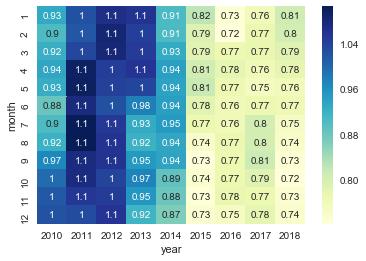

In [25]:
#df_heat_map=df_final_3.loc[df_final_3.groupby("year")["bid_close"].idxmax()][['year','bid_close']]
df_final_3_heat_map=df_final_3[df_final_3['year'] < 2019]
df_heat_map=df_final_3_heat_map.loc[df_final_3_heat_map.groupby(["year","month"])["bid_close"].idxmax()][['year','month','bid_close']]
df_heat_map=df_heat_map.pivot("month", "year", "bid_close")
ax = sns.heatmap(df_heat_map, cmap="YlGnBu",annot=True)

In [26]:
len(df_final)

15269

In [27]:
year_wise=df_final_3.groupby(['year'])['target1'].mean().reset_index()

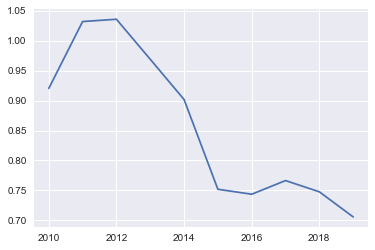

In [28]:
import matplotlib.pyplot as plt
plt.plot(year_wise['year'],year_wise['target1'])

In [29]:
df_final_3['year']=pd.DatetimeIndex(df_final_3['time_local']).year
X= df_final_3[df_final_3['year'] < 2018]

In [30]:
X.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,target1,target2,target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,trend_ema,mo_rsi,vol_atr,date_local,Date,Volatility,year,month,day
0,2010-01-05 18:00:00,1/5/2010 18:00,1/5/2010 22:00,0.9132,0.9153,0.9110,0.9124,0.9117,0.9135,0.9142,-0.076780,0.120416,0.196893,0.912400,50.000000,0.003669,2010-01-05,2010-01-05,1.0,2010,1,5
1,2010-01-05 22:00:00,1/5/2010 22:00,1/6/2010 2:00,0.9123,0.9126,0.9090,0.9117,0.9135,0.9142,0.9142,0.197044,0.273463,0.273463,0.912021,0.000000,0.003664,2010-01-05,2010-01-05,1.0,2010,1,5
2,2010-01-06 02:00:00,1/6/2010 2:00,1/6/2010 6:00,0.9114,0.9138,0.9102,0.9135,0.9142,0.9142,0.9156,0.076570,0.076570,0.229358,0.912598,74.792244,0.003659,2010-01-06,2010-01-06,0.5,2010,1,6
3,2010-01-06 06:00:00,1/6/2010 6:00,1/6/2010 10:00,0.9134,0.9143,0.9123,0.9142,0.9142,0.9156,0.9184,0.000000,0.152905,0.457317,0.913104,81.126356,0.003541,2010-01-06,2010-01-06,0.5,2010,1,6
4,2010-01-06 10:00:00,1/6/2010 10:00,1/6/2010 14:00,0.9140,0.9151,0.9097,0.9142,0.9156,0.9184,0.9196,0.152905,0.457317,0.587212,0.913402,81.126356,0.003674,2010-01-06,2010-01-06,0.5,2010,1,6


In [31]:
X=X.drop(['time_local','start_time_local','end_time_local', 'target2', 'target3','PC_AUD_H4_target2','PC_AUD_H4_target1','PC_AUD_H4_target3','Date','date_local','bid_close'],axis=1)

#'class_target1'

In [32]:
X.isnull().sum()

bid_open         0
bid_high         0
bid_low          0
target1          0
trend_ema        0
mo_rsi           0
vol_atr          0
Volatility    4311
year             0
month            0
day              0
dtype: int64

In [33]:
X.fillna(0,inplace=True)

In [34]:
obj=X.loc[:, X.dtypes =='object']
for col in obj:
    obj[col] = pd.to_numeric(obj[col], errors='coerce')
X[obj.columns]=obj
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [35]:
X.to_csv("preciting_target_1.csv",index=False)

In [36]:
y=X['target1']
X=X.drop(['target1'],axis=1)

In [37]:
X.head()

,bid_open,bid_high,bid_low,trend_ema,mo_rsi,vol_atr,Volatility,year,month,day
0,0.9132,0.9153,0.9110,0.912400,50.000000,0.003669,1.0,2010,1,5
1,0.9123,0.9126,0.9090,0.912021,0.000000,0.003664,1.0,2010,1,5
2,0.9114,0.9138,0.9102,0.912598,74.792244,0.003659,0.5,2010,1,6
3,0.9134,0.9143,0.9123,0.913104,81.126356,0.003541,0.5,2010,1,6
4,0.9140,0.9151,0.9097,0.913402,81.126356,0.003674,0.5,2010,1,6


In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9487, 10) (9487,)
(4067, 10) (4067,)


In [40]:
from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
grid.best_params_

{'alpha': 0.0}

In [42]:
#clf = linear_model.Lasso()
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train,y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
ridge_train_score = clf.score(X_train,y_train)

In [44]:
ridge_train_score

0.9994170299041967

In [45]:
y_pred=clf.predict(X_test)
r2_score(y_test,y_pred)

0.9994618172574836

In [46]:
clf.coef_

array([ 2.39102858e-01,  2.49872804e-01,  2.52620619e-01,  2.52680123e-01,
        8.24426513e-05, -1.10844838e-03,  2.73725992e-05, -2.36012690e-04,
       -1.18615386e-05,  8.64875917e-08])

In [47]:
X_test.columns

Index(['bid_open', 'bid_high', 'bid_low', 'trend_ema', 'mo_rsi', 'vol_atr',
       'Volatility', 'year', 'month', 'day'],
      dtype='object')

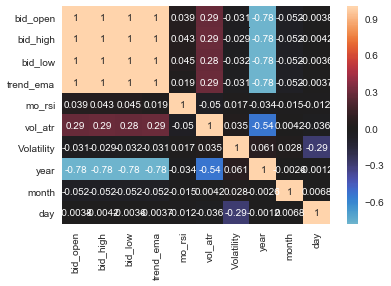

In [48]:

sns.heatmap(X.corr(),center=0,annot=True)

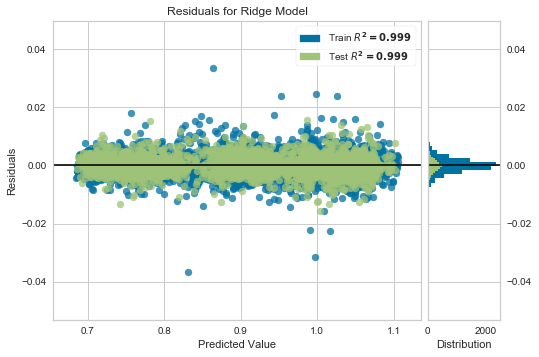

In [49]:

from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()


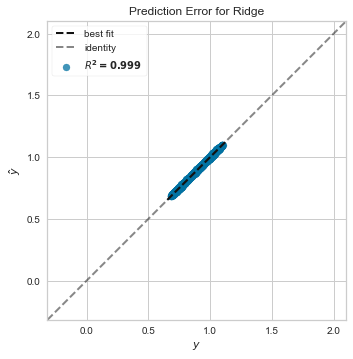

In [50]:


from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Ridge()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

In [51]:
len(y_test),len(y_pred)

(4067, 4067)

In [52]:
y_test1=pd.DataFrame(y_test)
y_pred1=pd.DataFrame(y_pred)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']

In [53]:
y_pred1.index=y_test1.index

In [54]:
df_plot=pd.concat([X_test,y_test1,y_pred1],axis=1,sort=False)

In [55]:
df_plot.head()

,bid_open,bid_high,bid_low,trend_ema,mo_rsi,vol_atr,Volatility,year,month,day,y_test,y_pred
3835,1.0371,1.0384,1.0346,1.044261,23.207901,0.004801,0.000000,2012,3,22,1.0377,1.035902
9718,0.7077,0.7092,0.7073,0.705948,67.712022,0.003609,0.000000,2015,9,11,0.7086,0.709606
5323,1.0413,1.0428,1.0406,1.043155,41.537021,0.002150,0.000000,2013,1,28,1.0416,1.040545
2454,1.0681,1.0709,1.0674,1.070906,45.618690,0.004579,2.333333,2011,6,7,1.0701,1.068565
1394,0.9832,0.9868,0.9813,0.987464,45.701499,0.005257,0.000000,2010,10,26,0.9767,0.984548


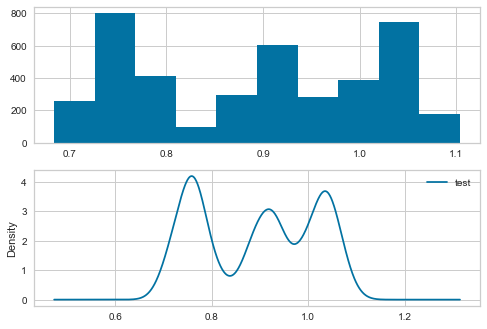

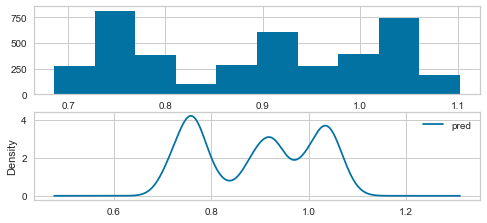

In [56]:
from pandas import Series
from matplotlib import pyplot
series = df_plot['y_test']
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde',label='test')
pyplot.legend()
series2 = df_plot['y_pred']
pyplot.figure(2)
pyplot.subplot(311)
series2.hist()
pyplot.subplot(312)
series2.plot(kind='kde',label='pred')
pyplot.legend()
pyplot.show()


In [57]:
year_wise=df_plot.groupby(['year'])['y_test','y_pred'].mean().reset_index()
month_wise=df_plot.groupby(['year','month'])['y_test','y_pred'].mean().reset_index()

In [58]:
year_wise

,year,y_test,y_pred
0,2010,0.923752,0.924426
1,2011,1.033216,1.033155
2,2012,1.035572,1.034928
3,2013,0.966798,0.966613
4,2014,0.900969,0.900720
5,2015,0.752981,0.753455
6,2016,0.743608,0.743875
7,2017,0.765940,0.765645


In [59]:
month_wise.head()

,year,month,y_test,y_pred
0,2010,1,0.911045,0.912411
1,2010,2,0.886003,0.886845
2,2010,3,0.910619,0.911179
3,2010,4,0.927046,0.927896
4,2010,5,0.870762,0.871907


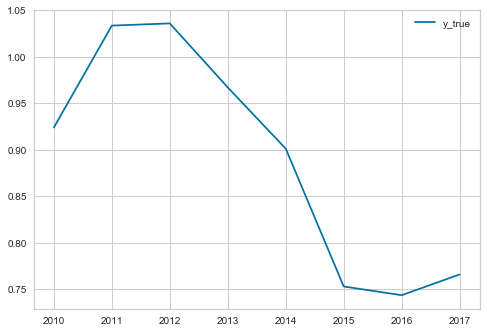

In [60]:
plt.plot(year_wise['year'],year_wise['y_test'],label='y_true')

plt.legend()

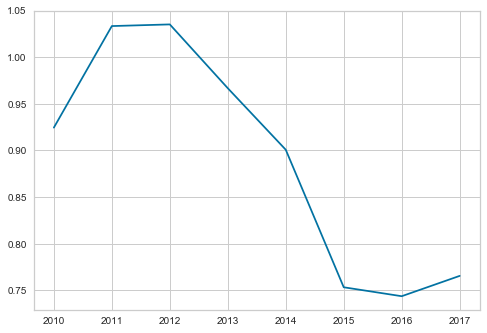

In [61]:
plt.plot(year_wise['year'],year_wise['y_pred'],label='y_pred')

In [62]:
X= df_final_3[df_final_3['year'] < 2018]
X=X.drop(['time_local','start_time_local','end_time_local', 'target1','target2', 'target3','PC_AUD_H4_target2','PC_AUD_H4_target3','Date','date_local','bid_close'],axis=1)

#''PC_AUD_H4_target1''

In [63]:
X.head()

,bid_open,bid_high,bid_low,PC_AUD_H4_target1,trend_ema,mo_rsi,vol_atr,Volatility,year,month,day
0,0.9132,0.9153,0.9110,-0.076780,0.912400,50.000000,0.003669,1.0,2010,1,5
1,0.9123,0.9126,0.9090,0.197044,0.912021,0.000000,0.003664,1.0,2010,1,5
2,0.9114,0.9138,0.9102,0.076570,0.912598,74.792244,0.003659,0.5,2010,1,6
3,0.9134,0.9143,0.9123,0.000000,0.913104,81.126356,0.003541,0.5,2010,1,6
4,0.9140,0.9151,0.9097,0.152905,0.913402,81.126356,0.003674,0.5,2010,1,6


In [64]:
X.fillna(0,inplace=True)
obj=X.loc[:, X.dtypes =='object']
for col in obj:
    obj[col] = pd.to_numeric(obj[col], errors='coerce')
X[obj.columns]=obj
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [65]:
y=X['PC_AUD_H4_target1']
X=X.drop(['PC_AUD_H4_target1'],axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9487, 10) (9487,)
(4067, 10) (4067,)


In [67]:
clf = linear_model.Ridge()
clf.fit(X_train,y_train)
ridge_train_score = clf.score(X_train,y_train)
y_pred=clf.predict(X_test)


In [68]:
ridge_train_score

0.0007638755409433706

In [69]:
clf.coef_

array([ 3.67348372e-02, -5.65756405e-02,  6.52317234e-02, -8.31690575e-02,
       -2.42027314e-04, -3.83596656e-02, -1.64913821e-03, -2.09261410e-03,
        5.94774080e-05, -6.91620746e-04])

In [70]:
y_test1=pd.DataFrame(y_test)
y_pred1=pd.DataFrame(y_pred)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']
y_pred1.index=y_test1.index
df_plot=pd.concat([X_test,y_test1,y_pred1],axis=1,sort=False)

In [71]:
year_wise=df_plot.groupby(['year'])['y_test','y_pred'].mean().reset_index()
month_wise=df_plot.groupby(['year','month'])['y_test','y_pred'].mean().reset_index()
month_wise['year_month']=month_wise['year'].astype(str)+'-'+month_wise['month'].astype(str)

In [72]:
month_wise.head()

,year,month,y_test,y_pred,year_month
0,2010,1,-0.080042,0.005102,2010-1
1,2010,2,-0.090821,0.007029,2010-2
2,2010,3,0.060865,0.004332,2010-3
3,2010,4,0.042283,0.005470,2010-4
4,2010,5,-0.005932,0.007798,2010-5


In [73]:
year_wise.head()

,year,y_test,y_pred
0,2010,0.017629,0.005065
1,2011,-0.010273,-0.001262
2,2012,-0.011842,-0.002590
3,2013,-0.011828,-0.001831
4,2014,-0.025680,-0.001637


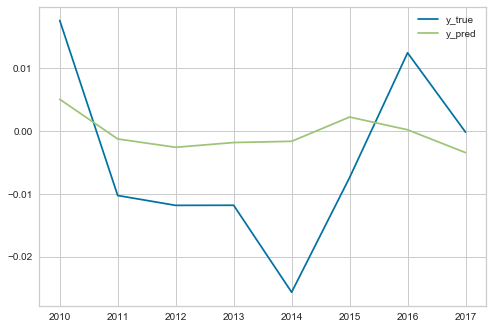

In [74]:
plt.plot(year_wise['year'],year_wise['y_test'],label='y_true')
plt.plot(year_wise['year'],year_wise['y_pred'],label='y_pred')
plt.legend()

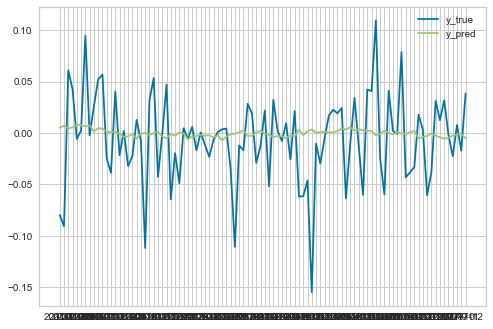

In [75]:
plt.plot(month_wise['year_month'],month_wise['y_test'],label='y_true')
plt.plot(month_wise['year_month'],month_wise['y_pred'],label='y_pred')
plt.legend()

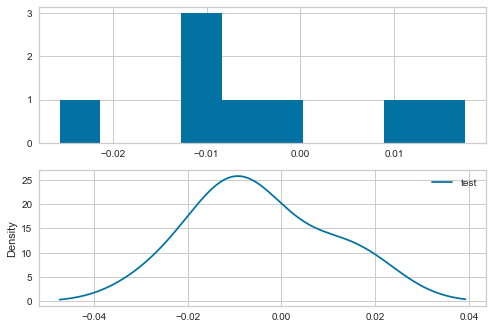

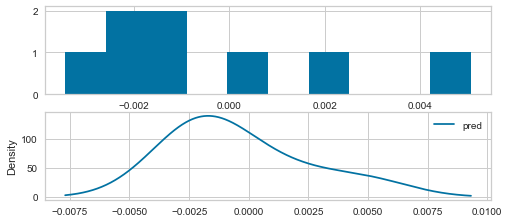

In [76]:
from pandas import Series
from matplotlib import pyplot
series = year_wise['y_test']
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde',label='test')
pyplot.legend()
series2 = year_wise['y_pred']
pyplot.figure(2)
pyplot.subplot(311)
series2.hist()
pyplot.subplot(312)
series2.plot(kind='kde',label='pred')
pyplot.legend()
pyplot.show()
